In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


# 1. 패션 MNIST 데이터셋 임포트하기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # 4 개의 넘파이 배열 반환

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle boot']

# 2. 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

# 3. 데이터 전처리

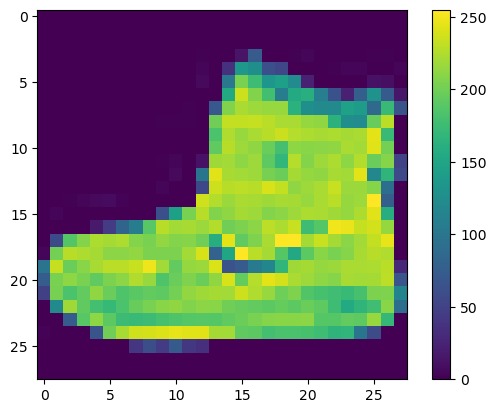

In [9]:
plt.figure() # 도화지 생성
plt.imshow(train_images[0]) # 이미지 데이터 보여주기
plt.colorbar() # 컬러 바
plt.grid(False) # 그리드 라인 표시하지 않음
plt.show()

In [10]:
# 값의 범위를 0 ~ 1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

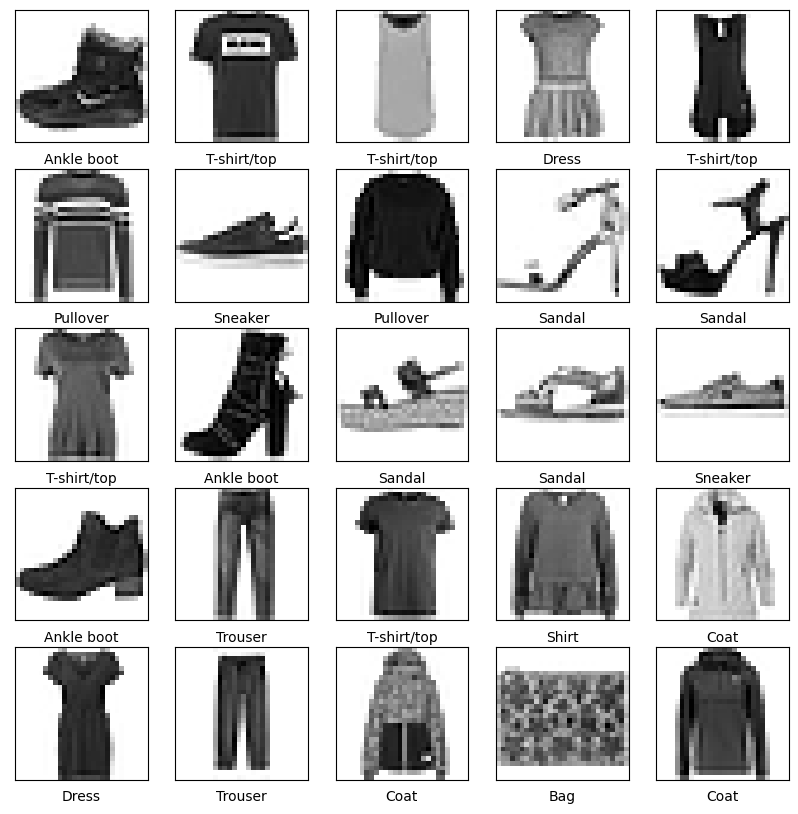

In [11]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 4. 모델구성
신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일

## 4-1. 층 설정
신경망의 기본 빌딩 블록은 레이어입니다. 레이어는 레이어에 공급된 데이터로부터 표현을 추출합니다. <br/>
<br/>
대부분 딥러닝은 간단한 층을 연결하여 구성합니다. **tf.keras.layers.Dense**와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # 1차원 배열로 변환
    tf.keras.layers.Dense(128, activation = 'relu'), # 밀집 연결, 완전 연결층이라고 부름
    tf.keras.layers.Dense(10)
])

이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력합니다.

## 4-2. 모델 컴파일

In [13]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

- 손실 함수: 훈련 중 모델이 얼마나 정확한지 측정합니다. 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 합니다.
- 옵티마이저: 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식입니다.
- 메트릭: 훈련 및 테스트 단계를 모니터링하는 데 사용됩니다. 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

# 5. 모델 훈련
신경망 모델을 훈련하려면 다음 단계가 필요합니다.
- 훈련 데이터를 모델에 주입합니다.
- 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
- 테스트 세트에 대한 모델의 예측을 만듭니다.
- 예측이 **test_labels** 배열의 레이블과 일치하는지 확인합니다.

## 5-1. 모델 피드

In [14]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5035 - accuracy: 0.8217
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3377 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3109 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2927 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2784 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2674 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2565 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

## 5-2 정확도 평가
모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다.

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3339 - accuracy: 0.8848 - 484ms/epoch - 2ms/step

Test accuracy: 0.8848000168800354


테스트 세트의 정확도가 훈련 세트의 정확도보다 조금 낮습니다. 이 차이는 과대적합(overfitting) 때문입니다. 과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 말합니다.
- 과대적합 시연
- 과대적합을 방지하기 위한 전략

## 5-3. 예측하기
훈련된 모델을 사용하여 일부 이미지에 대한 예측을 수행할 수 있습니다. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.

In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [18]:
predictions[0] # 첫 번째 예측

array([2.8974605e-07, 1.0692550e-08, 9.1222514e-09, 5.5180521e-10,
       3.6065355e-09, 4.3641631e-03, 9.3789396e-07, 1.3149280e-02,
       6.3702777e-07, 9.8248476e-01], dtype=float32)

예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다.

In [19]:
np.argmax(predictions[0]) # 가장 높은 신뢰도를 가진 레이블

9

**np.argmax()**는 NumPy에서 제공하는 함수로, 주어진 배열에서 가장 큰 값의 인덱스를 반환합니다.

In [22]:
test_labels[0]

9

In [24]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i] # 이미지의 실제 레이블, 이미지 데이터 선택
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = plt.cm.binary) # plt.cm.binary: 흑백 이미지 표시

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color = color)

In [25]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

## 5-4. 예측 확인

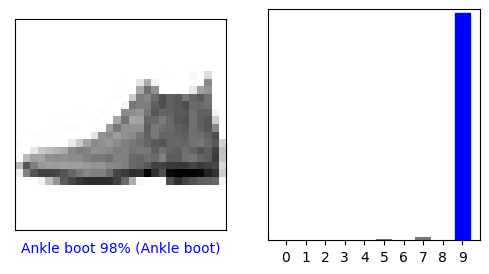

In [26]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

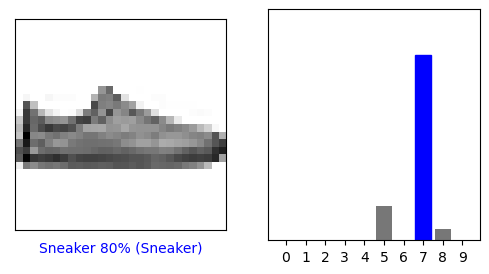

In [27]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

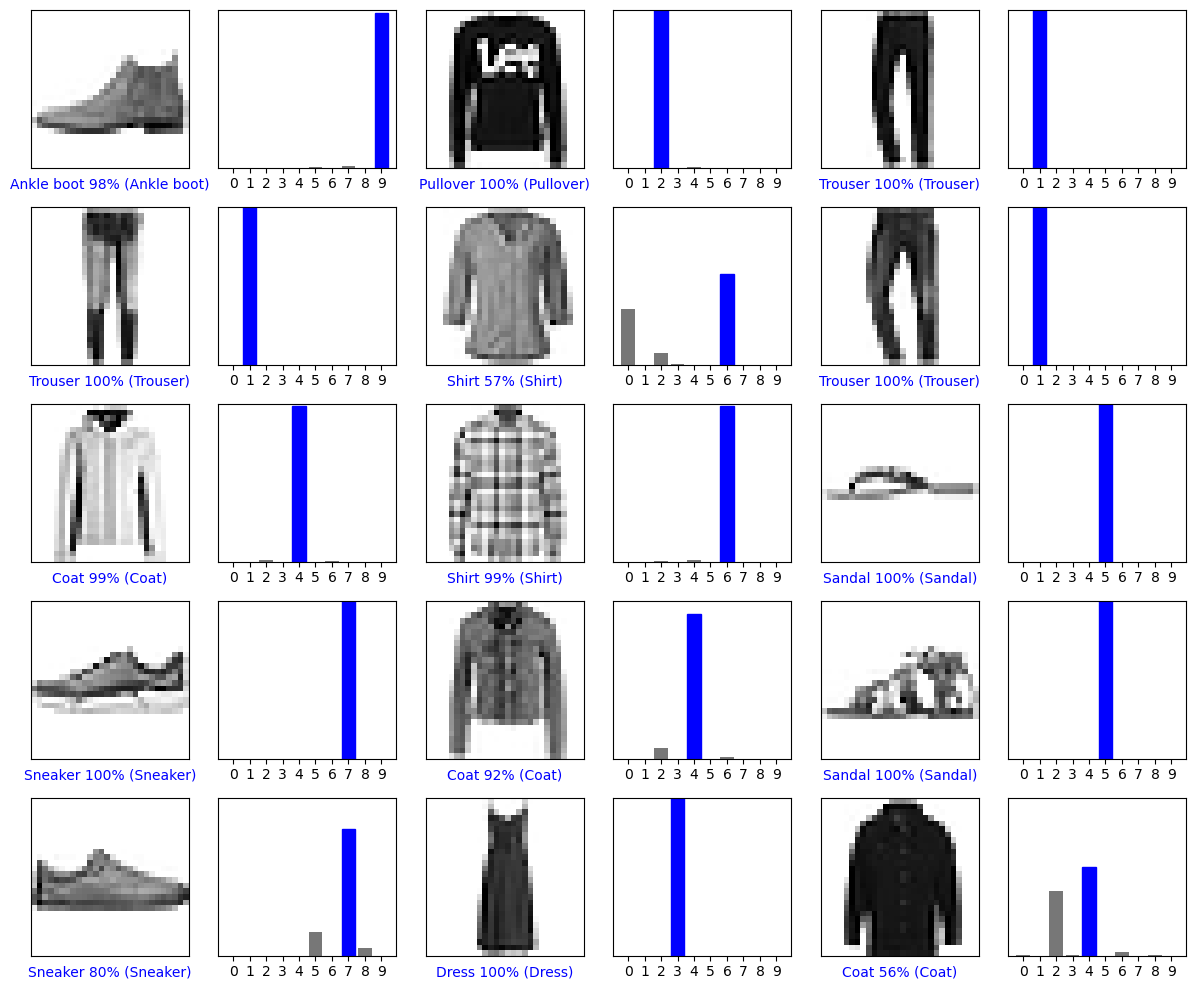

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 6. 훈련된 모델 사용하기

In [29]:
img = test_images[1]

print(img.shape)

(28, 28)


In [30]:
# 2차원 배열로 만듦
img = (np.expand_dims(img, 0)) # 3차원 배열로 확장

print(img.shape)

(1, 28, 28)


**np.expand_dims()** 함수는 배열의 차원을 확장하는 함수입니다.

In [31]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[6.43265739e-05 3.70243461e-17 9.99211788e-01 1.02587015e-10
  6.95808791e-04 8.97117938e-14 2.80269924e-05 1.15305237e-20
  2.83695567e-11 1.00472007e-14]]


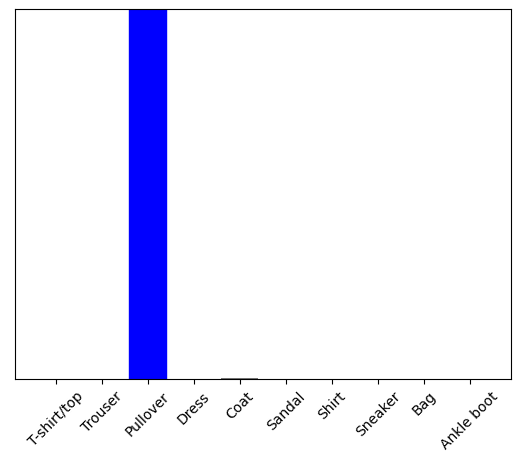

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [33]:
np.argmax(predictions_single[0])

2